# Dimensionality Reduction and Visualisations

## import modules and configure notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import swifter

%matplotlib inline
pd.set_option('max.rows', None)
pd.set_option('max.columns', None)

/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### configurations
* data_set -> string, 'all_train'|'test'|'superficial'|'bedrock', sets the dataset for visualisation
* save_plots -> boolean, if set to True then saves plots
* colour_by -> string, any categorical feature name, the datapoints will be coloured by the values of the feature in visualisations

In [2]:
data_set = 'test'
save_plots = True
colour_by = 'class'

### datasets required for the specified visualisations are loaded

In [3]:
if data_set == 'all_train':
    %store -r train_data
    %store -r PC_df_train
    %store -r my_pca_train
    %store -r tsne_df_train
    
    data = train_data
    PC_data = PC_df_train
    PCA_object = my_pca_train
    tsne_data = tsne_df_train
    title = 't-SNE Analysis of Bedrock and Superficial Sample Data'
    
    
if data_set == 'bedrock':
    %store -r train_data
    %store -r PC_df_bedrock_train
    %store -r my_pca_train_bedrock
    %store -r tsne_df_bedrock_train
    
    data = train_data[train_data['Geology'] == 'Bedrock']
    PC_data = PC_df_bedrock_train
    PCA_object = my_pca_train_bedrock
    tsne_data = tsne_df_bedrock_train
    title = 't-SNE Analysis of Bedrock Sample Data'
    
if data_set == 'superficial':
    %store -r train_data
    %store -r PC_df_superficial_train
    %store -r my_pca_train_superficial
    %store -r tsne_df_superficial_train
    
    data = train_data[train_data['Geology'] == 'Superficial'].reset_index(drop = True)
    PC_data = PC_df_superficial_train
    PCA_object = my_pca_train_superficial
    tsne_data = tsne_df_superficial_train
    title = 't-SNE Analysis of Superficial Sample Data'
    
if data_set == 'test':
    %store -r test_data
    %store -r PC_df_test
    %store -r my_pca_test
    %store -r tsne_df_test
    
    data = test_data.reset_index(drop = True)
    data['class'] = 1
    PC_data = PC_df_test
    PCA_object = my_pca_test
    tsne_data = tsne_df_test
    title = 't-SNE of Artefact Data'

### column that will colour the datapoints is appended to the dataset

In [4]:
PC_data_with_colour = pd.concat([PC_data, data['class']], axis = 1)

### variances and cumulative variances for the principal components are stored

In [5]:
variances = PCA_object.explained_variance_ratio_
cumu_variances = np.cumsum(PCA_object.explained_variance_ratio_)

In [6]:
PC_names = PC_data_with_colour.columns.values[0:-1]

In [7]:
var_df = pd.DataFrame(data = {'percentage variance (%)' : variances, 'Principal components' : PC_names, 'cumulative percentage variance (%)':cumu_variances})

## visualisation of Principal Components

### visualise principal components in two dimensions
* x and y needs to be defined e.g. if want to plot principal components 1 and 2 then set to PC1 and PC2

"\nif save_plots == True:\n    fig = plot.get_figure()\n    fig.savefig(fname='2d_pca_{0}_bedrock'.format(colour_by))"

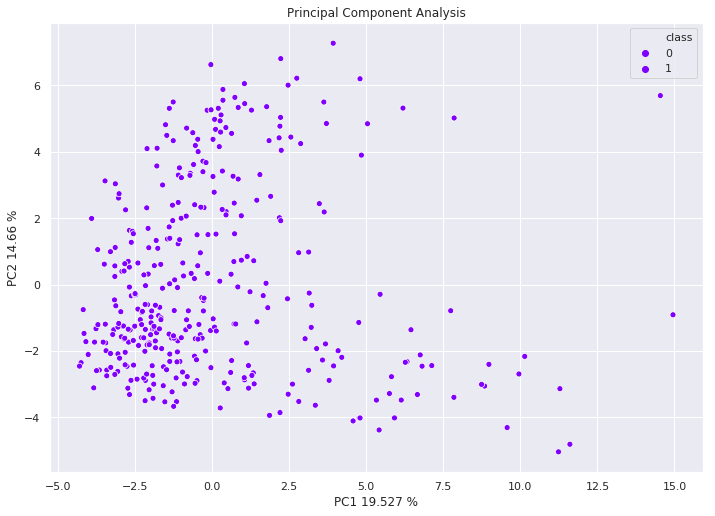

In [8]:
# X PC should be < than Y PC
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot_on_x = 'PC1'
plot_on_y = 'PC2'

plot = sns.scatterplot(data = PC_data_with_colour, x = plot_on_x, y = plot_on_y, hue=colour_by, palette = 'rainbow', )
plt.title('Principal Component Analysis')


var_val = int(plot_on_x.replace('PC', ''))
plt.xlabel('{0} {1} %'.format(plot_on_x, round(variances[var_val - 1]*100,3)))
plt.ylabel('{0} {1} %'.format(plot_on_y, round(variances[var_val]*100,3)))
if 
plt.legend()
'''
if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname='2d_pca_{0}_bedrock'.format(colour_by))'''

### percentage variance capture by each principal component

"\nif save_plots == True:\n    fig = plot.get_figure()\n    fig.savefig(fname='perc_var_bargraph_bedrock')"

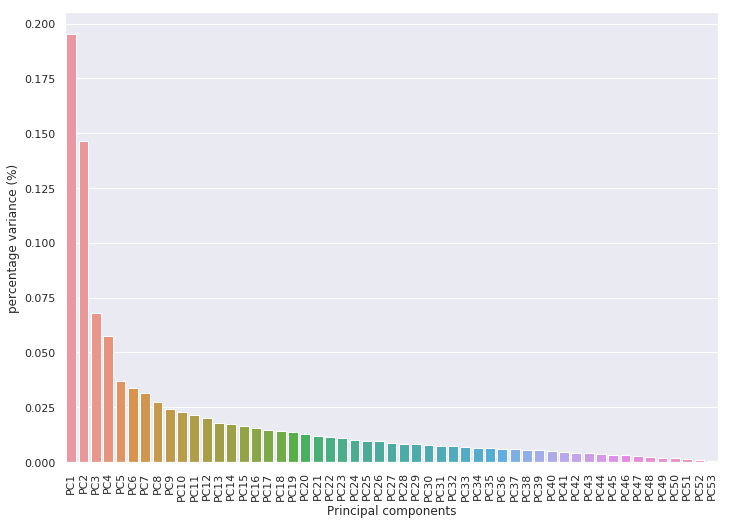

In [9]:
plot = sns.barplot(data = var_df, y = 'percentage variance (%)', x = 'Principal components')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
'''
if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname='perc_var_bargraph_bedrock')'''

### cumulative variance with increasing number of principal components

"\nif save_plots == True:\n    fig = plot.get_figure()\n    fig.savefig(fname='cumu_perc_var_bargraph_bedrock')"

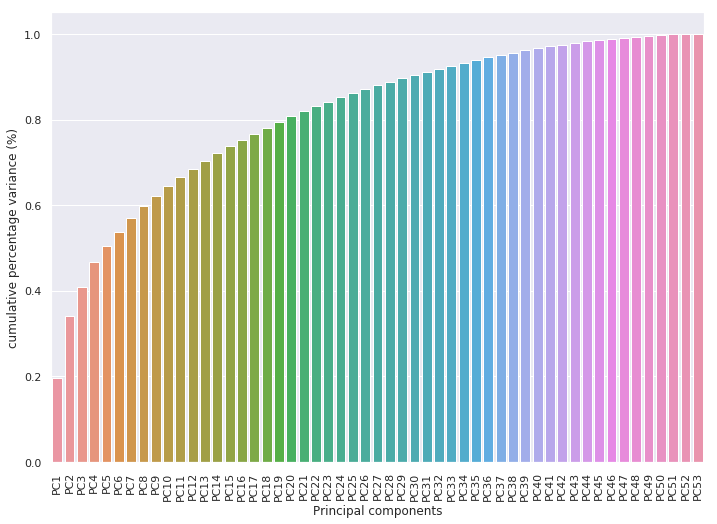

In [10]:
plot = sns.barplot(data = var_df, y = 'cumulative percentage variance (%)', x = 'Principal components')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
'''
if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname='cumu_perc_var_bargraph_bedrock')'''

### static tSNE plots

### column that will colour the datapoints is appended to the dataset

In [11]:
tsne_data_with_colour = pd.concat([tsne_data, pd.Series(PC_data_with_colour['class'])], axis = 1)

### visualise t-SNE in two dimensions


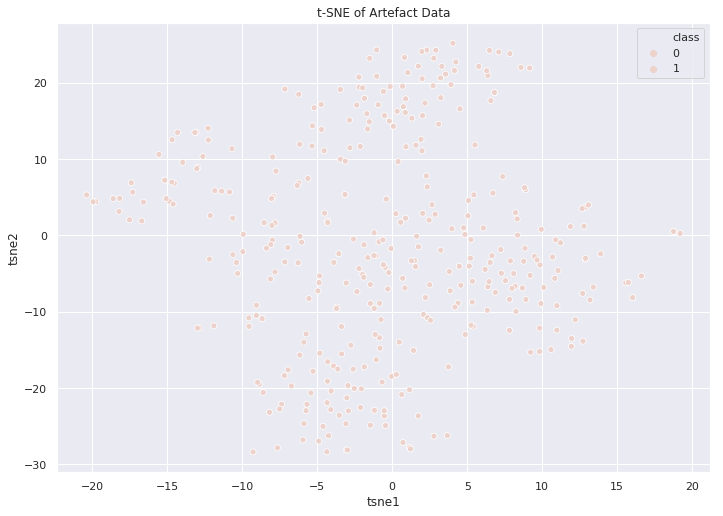

In [12]:
if data_set != 'test':
    plot_on_x = 'tsne1'
    plot_on_y = 'tsne2'

    sns.scatterplot(data = tsne_data_with_colour, x = plot_on_x, y = plot_on_y, hue=colour_by)
    plt.title(title)

    if save_plots == True:
        fig = plot.get_figure()
        fig.savefig(fname='figures/2d_tSNE_{0}_bedrock'.format(colour_by))

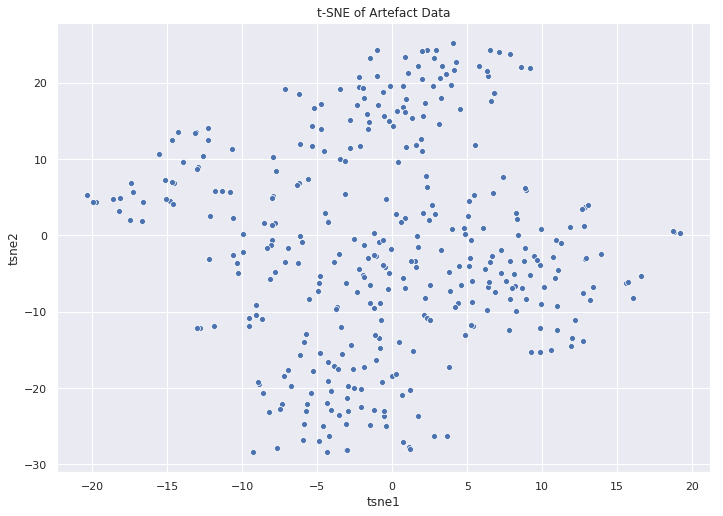

In [14]:
if data_set == 'test':
    plot_on_x = 'tsne1'
    plot_on_y = 'tsne2'

    sns.scatterplot(data = tsne_data_with_colour, x = plot_on_x, y = plot_on_y, legend = False)
    plt.title(title)

    if save_plots == True:
        fig = plot.get_figure()
        fig.savefig(fname='figures/2d_tSNE_{0}_bedrock'.format(colour_by))